## ->Aykırı Gözlem

Veride genel eğilimin oldukça dışına çıkan yada diğer gözlemlerden oldukça farklı olan gözlemlere aykırı gözlem denir.

Neye Göre Aykırı;
1- Sektör bilgisi --> genellemeye uymayanları dışarıda bırakmalıyız. 

2- Standart sapma yaklaşımı --> Ortalama üzerine eklenip çıkarılarak bir eşik değere göre aykırı yada değildir.

3- Z-skrou yaklaşımı --> dağılımın sağ ve soluna +- 2,5 konulursa

4- Boxplot (kutu grafiği)


In [4]:
import seaborn as sns
df=sns.load_dataset("diamonds")
df=df.select_dtypes(include=['Float64','int64'])
df=df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table=df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

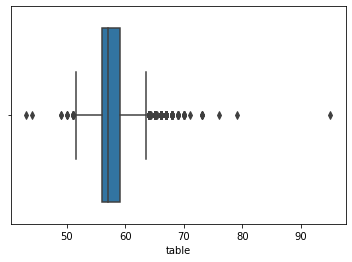

In [7]:
sns.boxplot(x=df_table)

In [8]:
q1=df_table.quantile(0.25)
q3=df_table.quantile(0.75)
IQR=q3-q1

In [20]:
alt=q1-1.5*IQR
üst=q3+1.5*IQR
print("Alt sınır:" + str(alt))
print("Üst sınır:" + str(üst))

Alt sınır:51.5
Üst sınır:63.5


### silme

In [19]:
import pandas as pd
type(df_table)

pandas.core.series.Series

df_table=pd.DataFrame(df_table)
t_df=df_table[~((df_table<alt) | (df_table > üst))].any(axis=1)

### Ortalama ile doldurma

df_table[aykiri_tf]=df_table.mean()

### Baskılama Yöntemi

df_table[aykiri_tf]=alt_sinir

# -> Çok değişkenli aykırı gözlem analizi

## ->Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize olanak sağlar.

In [34]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [35]:
clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1)

In [36]:
clf.fit_predict(df) # skorlar

array([-1, -1, -1, ...,  1,  1,  1])

In [40]:
df_scores=clf.negative_outlier_factor_

In [41]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [42]:
esik_deger=np.sort(df_scores)[13] # eşik değer
aykiri_tf=df_scores > esik_deger

In [44]:
yeni_df=df[df_scores > esik_deger] # aykırı olmayanalar
yeni_df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


## Baskılama yöntemi

In [48]:
baski=df[df_scores==esik_deger]
aykirilar=df[aykiri_tf]

In [53]:
res=aykirilar.to_records(index=False)
res[:]=baski.to_records(index=False)
res[:10]

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

# -> Eksik Gözlem Analizi